In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [2]:
plt.rc('font',family='Malgun Gothic')

In [3]:
df_City = pd.read_csv('../data/City Hotel.csv')
df_Resort = pd.read_csv('../data/Resort Hotel.csv')

In [5]:
length = lambda x: x == 1
length_2 = lambda x: x == 0

In [6]:
df_City_1 = df_City[df_City['is_canceled'].apply(length)]
df_City_0 = df_City[df_City['is_canceled'].apply(length_2)]
df_Resort_1 = df_Resort[df_Resort['is_canceled'].apply(length)]
df_Resort_0 = df_Resort[df_Resort['is_canceled'].apply(length_2)]

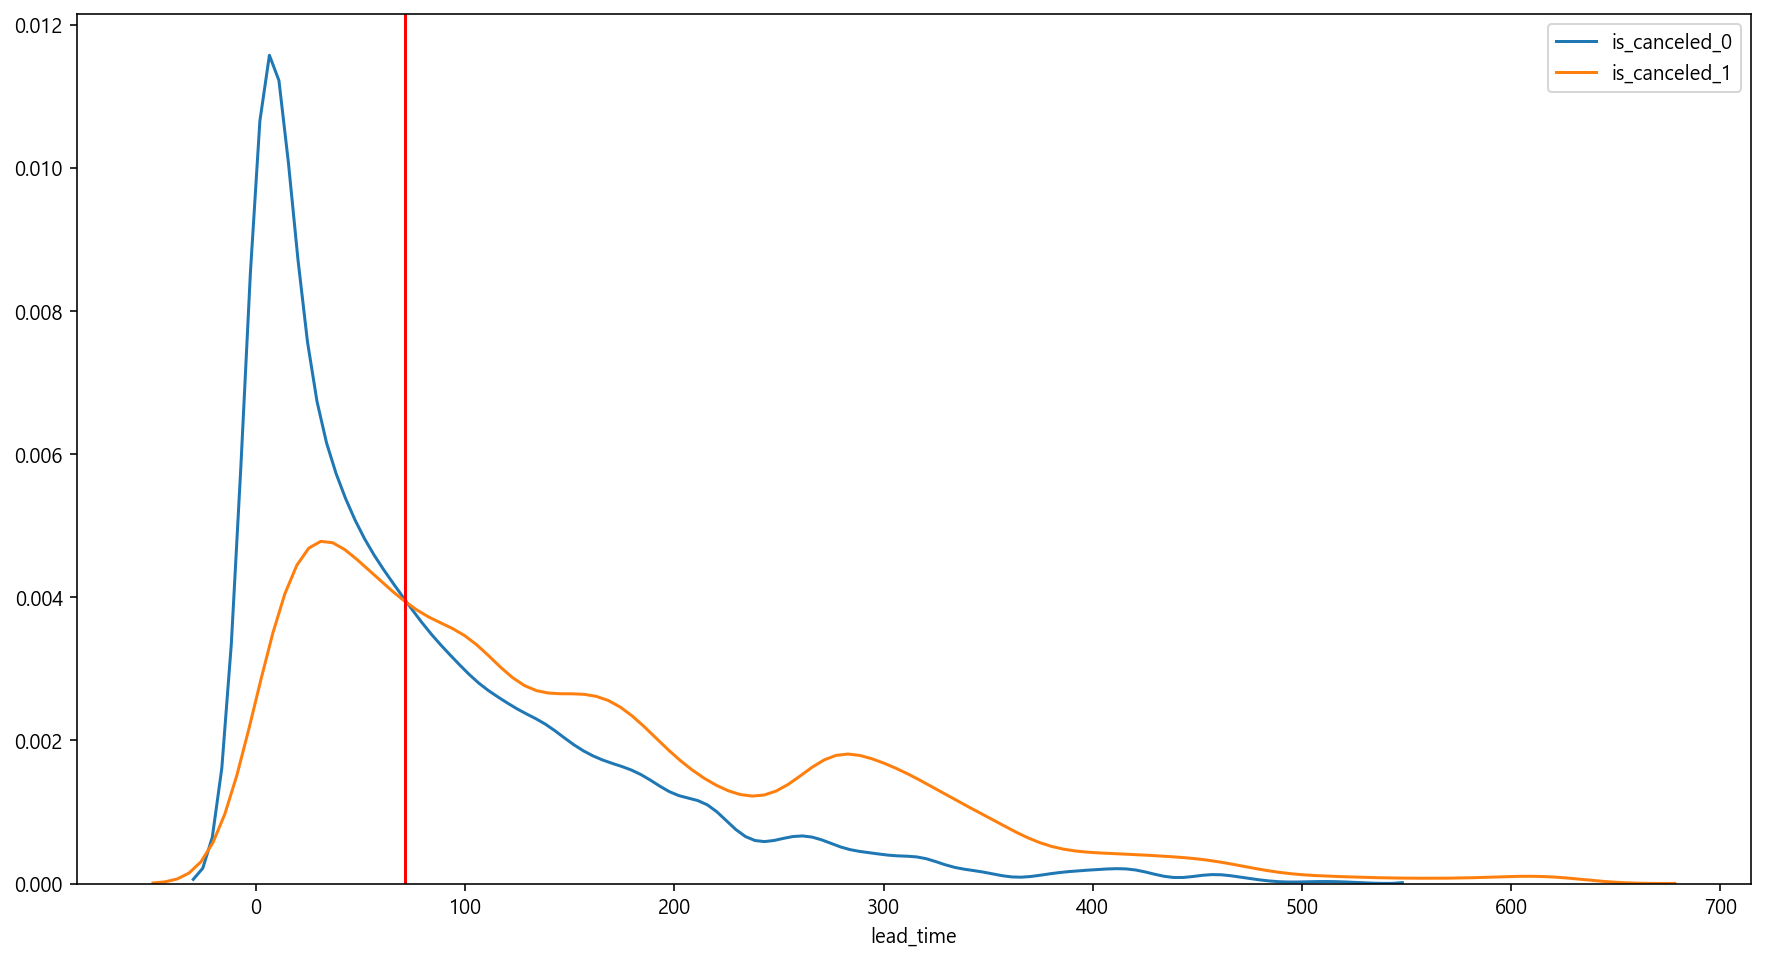

In [32]:
plt.figure(figsize=(15,8))
ax_1 = sns.distplot(df_City_0['lead_time'],label='is_canceled_0',hist=False)
ax_2 = sns.distplot(df_City_1['lead_time'],hist=False,label='is_canceled_1')
plt.axvline(x=71,color='red')

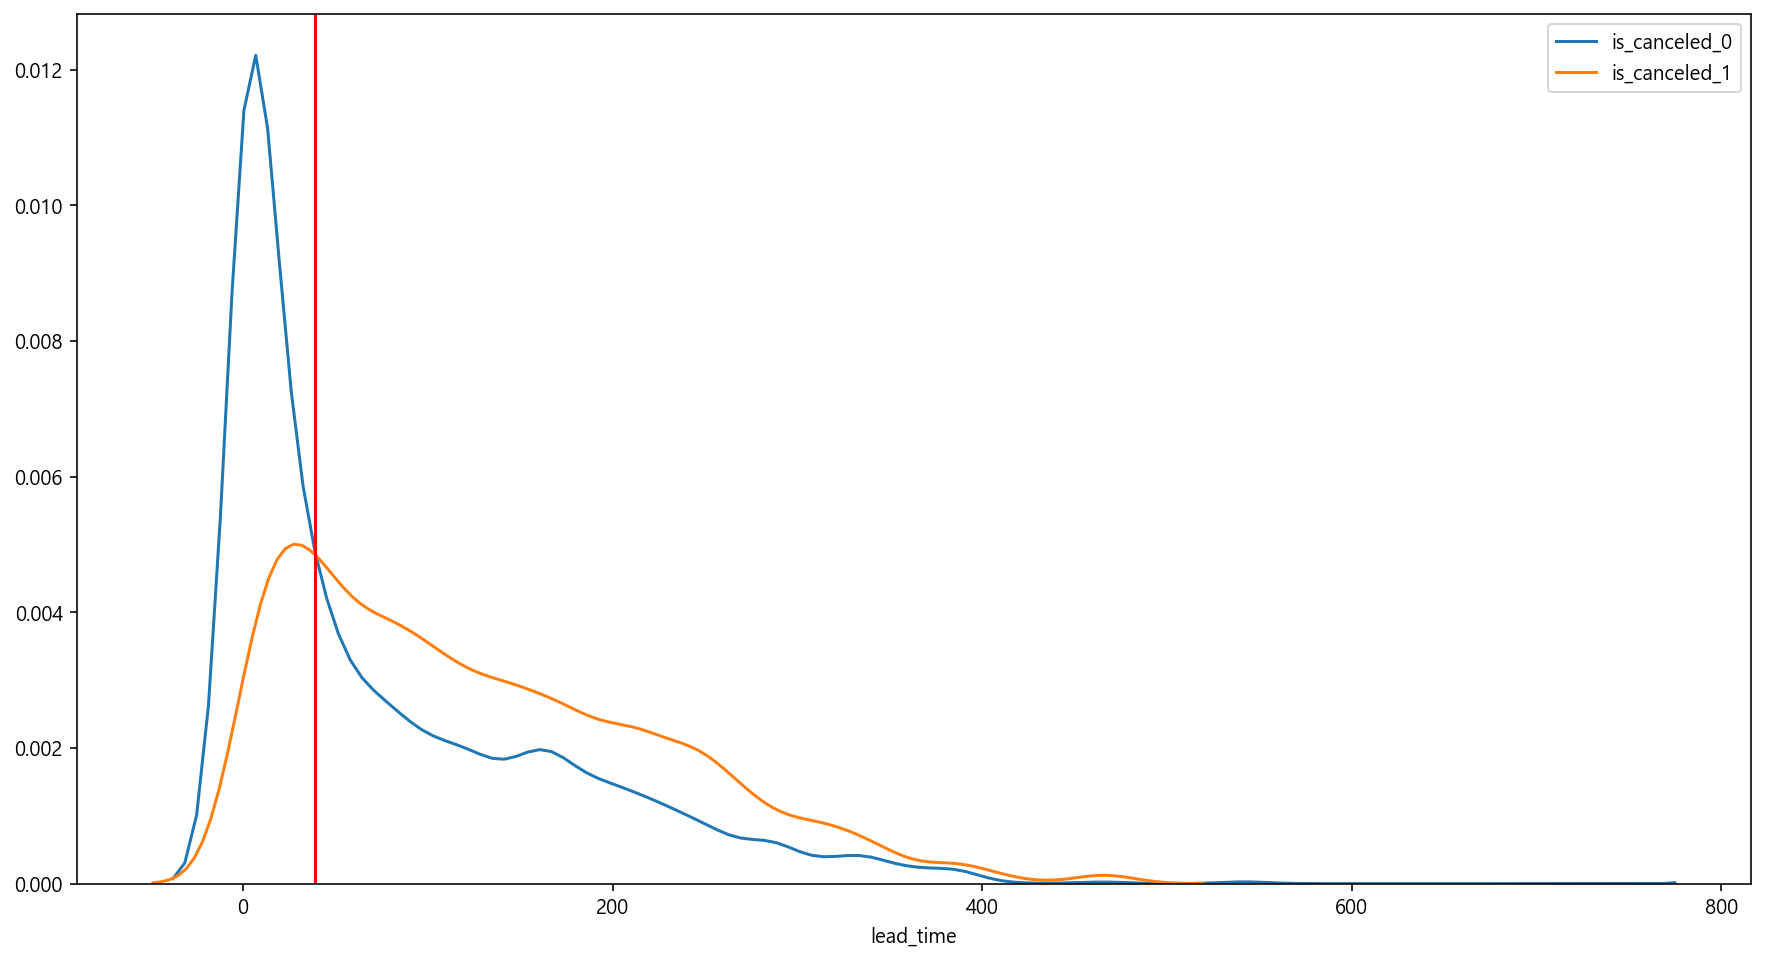

In [65]:
plt.figure(figsize=(15,8))
sns.distplot(df_Resort_0['lead_time'],hist=False,label='is_canceled_0')
sns.distplot(df_Resort_1['lead_time'],hist=False,label='is_canceled_1')
plt.axvline(x=39,color='red')

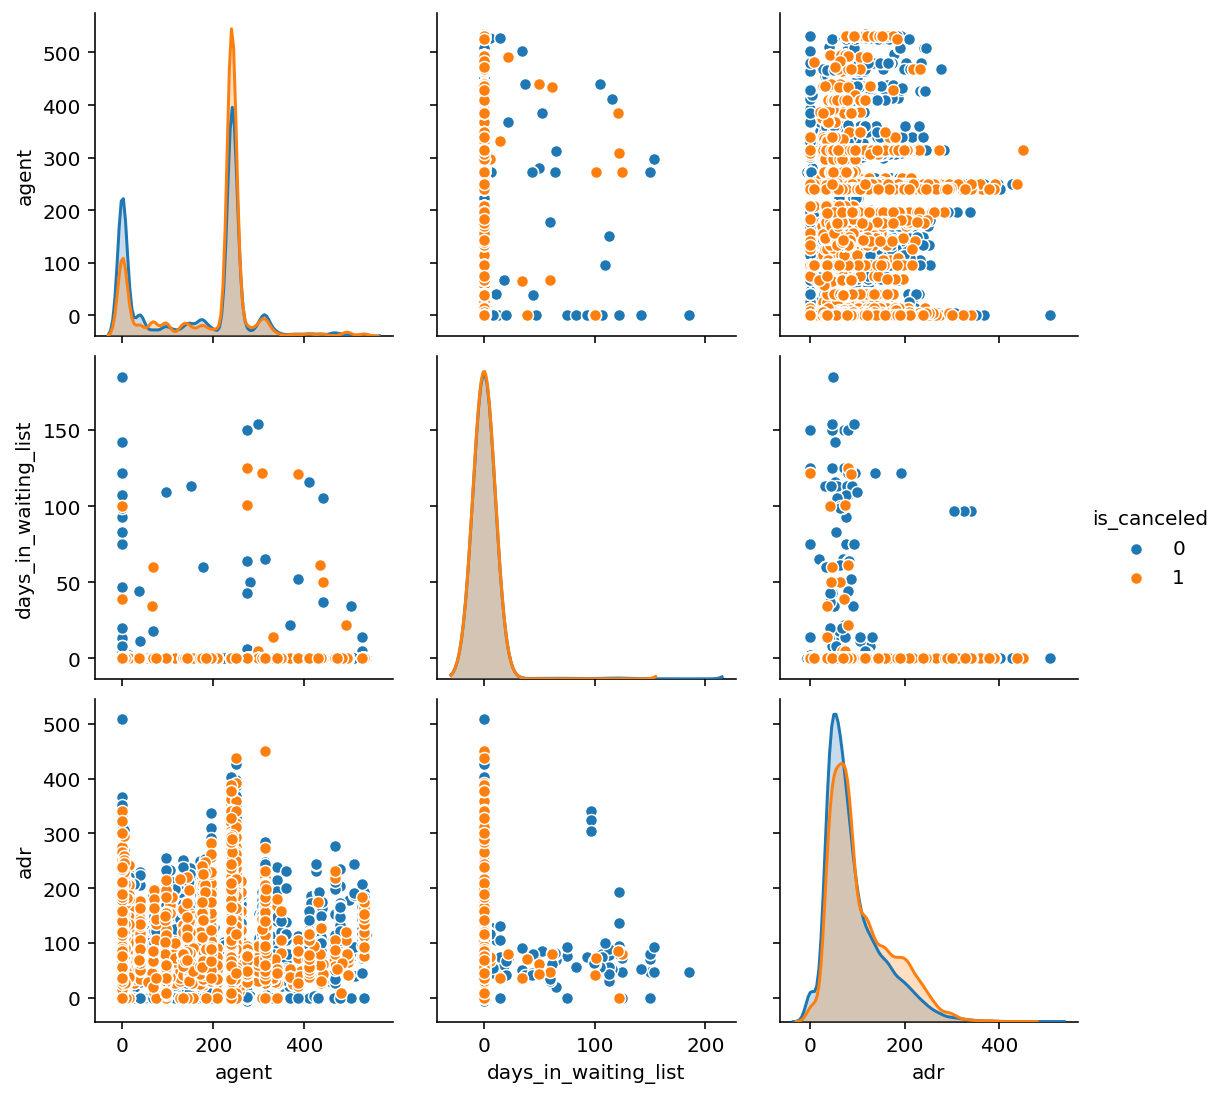

In [41]:
sns.pairplot(df_Resort[['agent','days_in_waiting_list','adr','is_canceled']],hue='is_canceled',diag_kws={'bw':10})

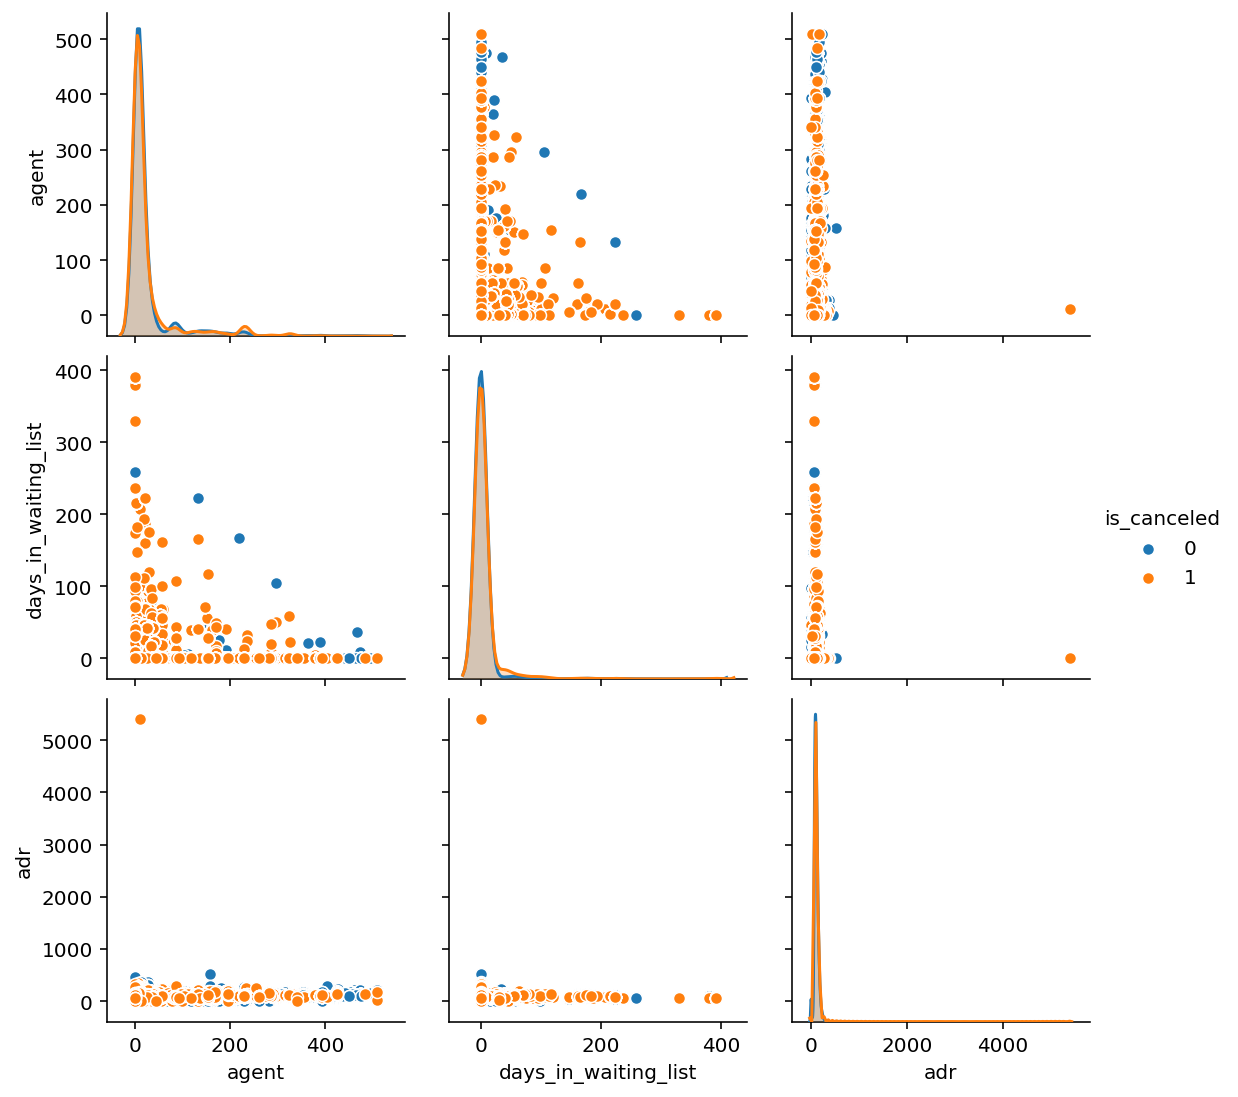

In [42]:
sns.pairplot(df_City[['agent','days_in_waiting_list','adr','is_canceled']],hue='is_canceled',diag_kws={'bw':10})

In [7]:
parking_spaces_City = list(df_City['required_car_parking_spaces'].unique())
parking_spaces_Resort = list(df_Resort['required_car_parking_spaces'].unique())

In [ ]:
for i in parking_spaces_City:
    globals()['df_City_Park{}'.format(i)] = df_City[df_City['required_car_parking_spaces']==i]
    print(i)

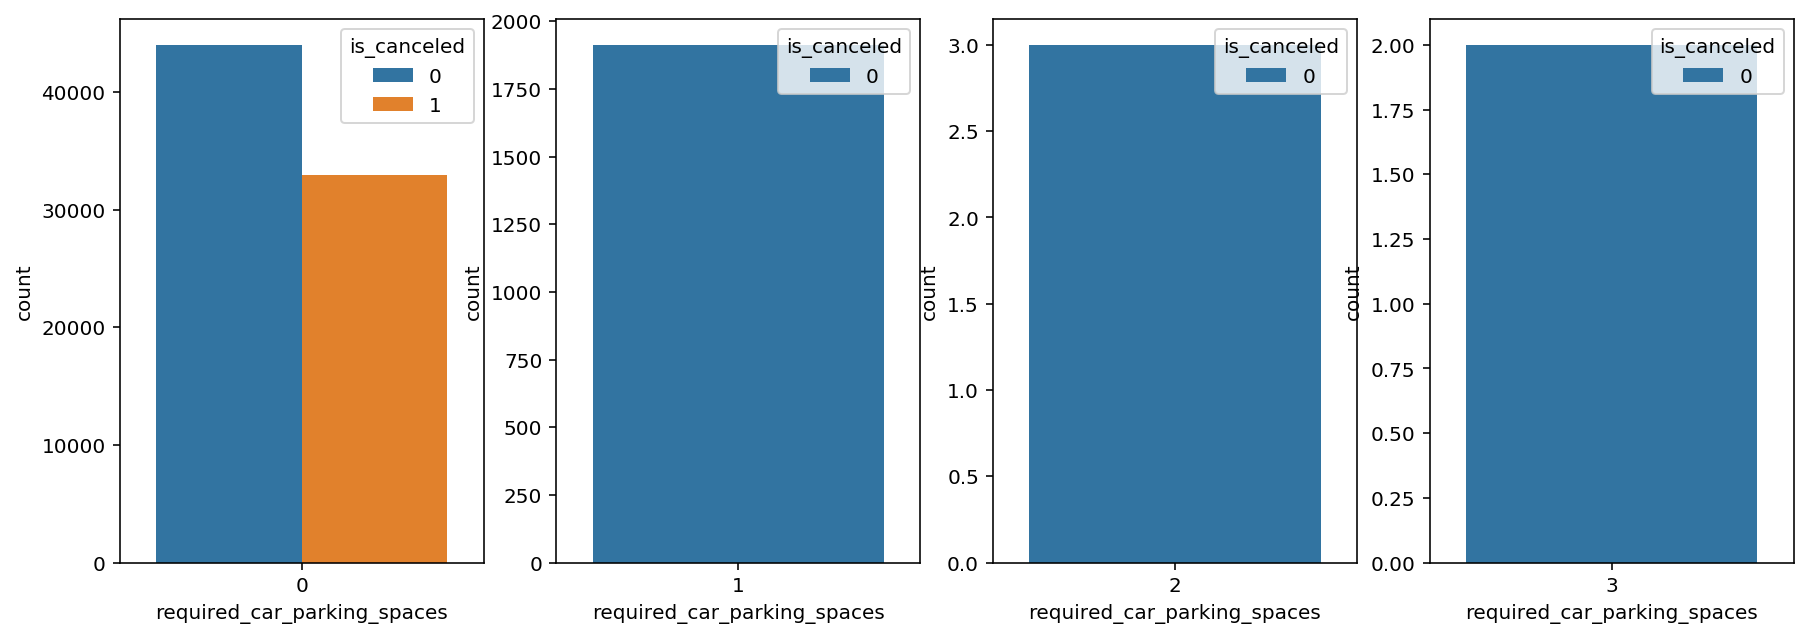

In [61]:
figure, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))
figure.set_size_inches(15,5)
for i,j in enumerate(parking_spaces_City):
     sns.countplot(data= globals()['df_City_Park{}'.format(j)] ,x='required_car_parking_spaces',hue='is_canceled',ax=axes[i])

In [63]:
for i in parking_spaces_Resort:
    globals()['df_Resort_Park{}'.format(i)] = df_Resort[df_Resort['required_car_parking_spaces']==i]
    print(i)

0
1
2
8
3


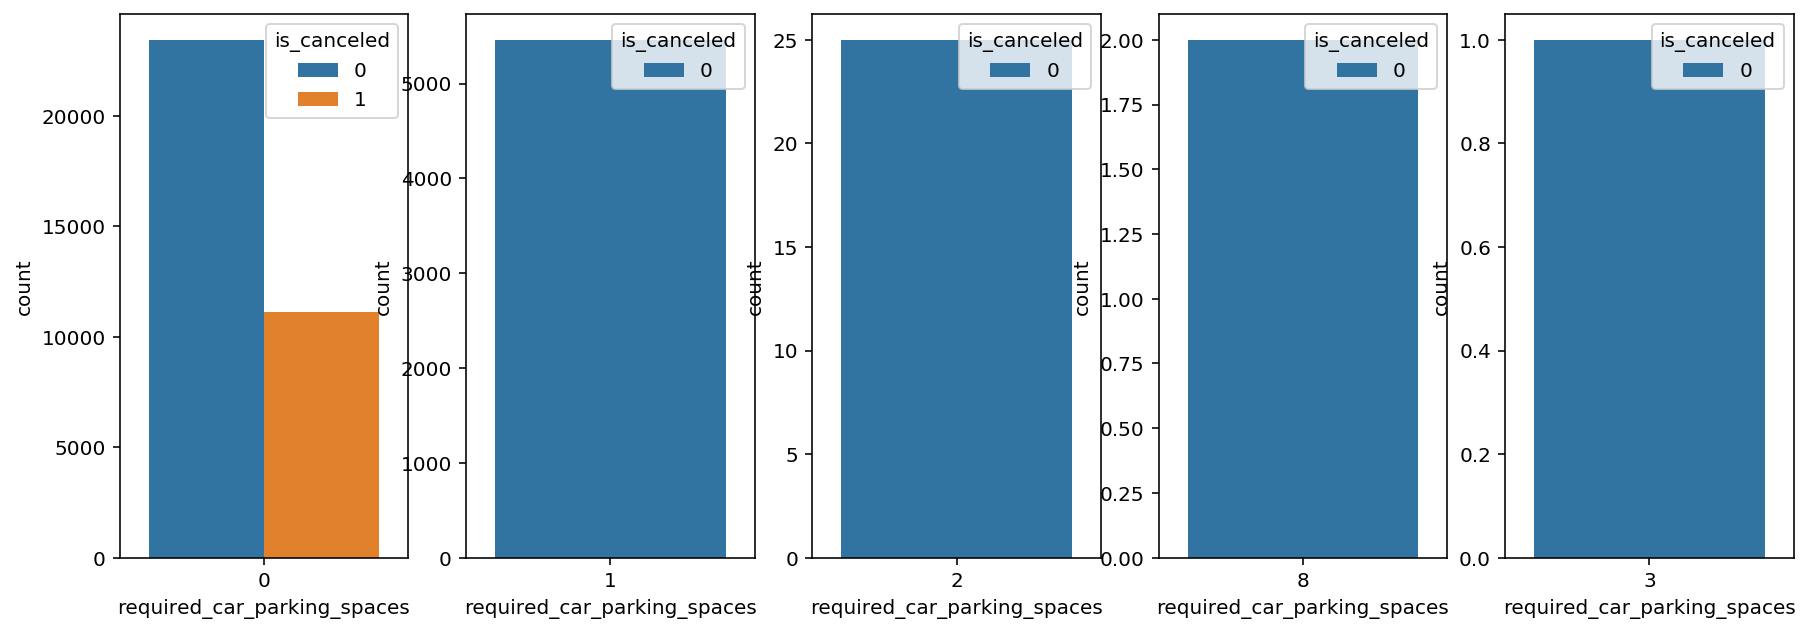

In [64]:
figure, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (20,5))
figure.set_size_inches(15,5)
for i,j in enumerate(parking_spaces_Resort):
     sns.countplot(data= globals()['df_Resort_Park{}'.format(j)] ,x='required_car_parking_spaces',hue='is_canceled',ax=axes[i])

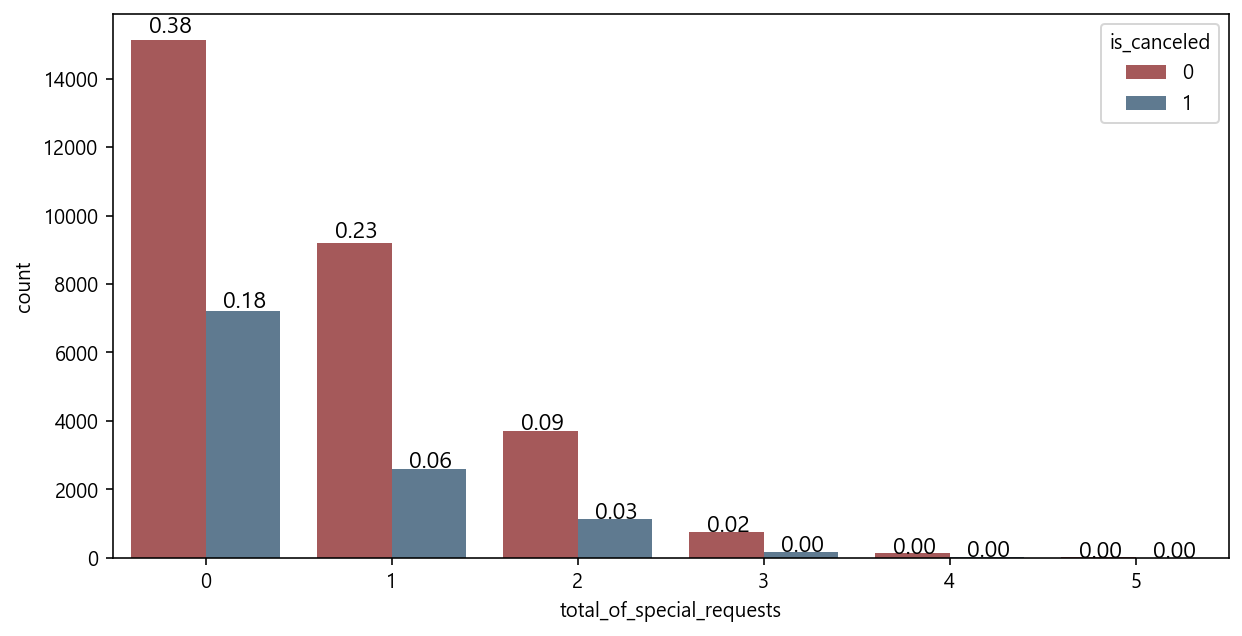

In [128]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df_Resort, x= 'total_of_special_requests',hue='is_canceled',palette=(sns.color_palette("Set1", n_colors=8, desat=.5)))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.2f"%(height/df_Resort.shape[0]),(left+width/1.9, height*1.015), ha='center',size=11.5)


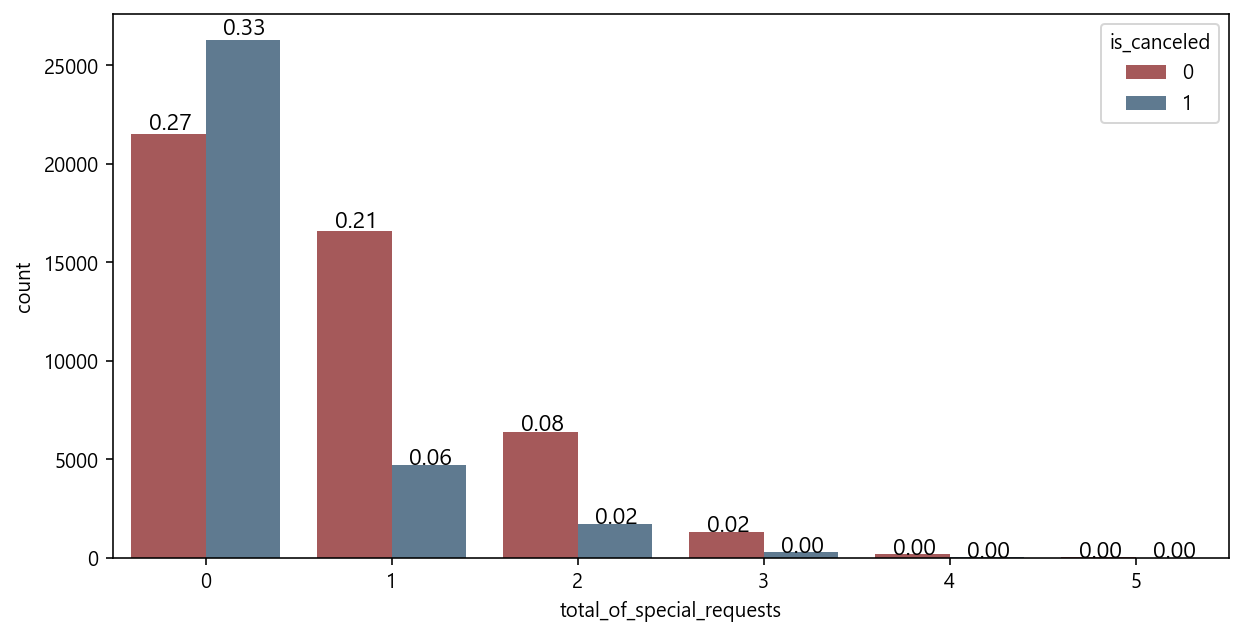

In [127]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df_City,x= 'total_of_special_requests',hue='is_canceled',palette=(sns.color_palette("Set1", n_colors=8, desat=.5)))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.2f"%(height/df_City.shape[0]),(left+width/1.9, height*1.011), ha='center',size=11.5)